## Importing the Data

In [1]:
import numpy as np
import pandas as pd
data= pd.read_csv('Compiled Data.csv')

## Clean the data

In [2]:
data = data.dropna(how='any')
print(data.head())

       Months  Single_Business_Permit     Cess  Advert_Fees  Market_fees  \
0  01/07/2017                908128.0  2750549      2667000      1158455   
1  01/08/2017                753856.0  1996700         2000      1623245   
2  01/09/2017               1548946.0  2061380         2000      1707264   
3  01/10/2017               1108374.0  2336950       639658      1686430   
4  01/11/2017               1085411.0  4042490       322632      1804455   

   House_Stall  Buspark  Land_rates_and_plot_rents  Technical_planning_fees  \
0     432418.0  1031700                     623234                   203600   
1     408690.0  1205270                     617489                   193020   
2     825670.0  1296340                    1402922                   132100   
3     314641.0  1293890                     684218                    32300   
4     291715.0  1555025                     893248                   199000   

   Street_Parking  Slaughter_House_Fee  
0          578970          

In [4]:
df=pd.DataFrame(data)
print(df.isnull().sum())


Months                       0
Single_Business_Permit       0
Cess                         0
Advert_Fees                  0
Market_fees                  0
House_Stall                  0
Buspark                      0
Land_rates_and_plot_rents    0
Technical_planning_fees      0
Street_Parking               0
Slaughter_House_Fee          0
dtype: int64


## Set the month column to a datetime format

In [6]:
df['Months'] = pd.to_datetime(df['Months'].astype(str),format='%d/%m/%Y' )

## plot the Single business permit revenue 

In [8]:
import matplotlib.pyplot as plt


<>:13: SyntaxWarning: invalid decimal literal
<>:13: SyntaxWarning: invalid decimal literal
C:\Users\user\AppData\Local\Temp\ipykernel_15688\3643217906.py:13: SyntaxWarning: invalid decimal literal
  plt.yticks([tick*1_000_000for tick in y_ticks], labels=y_ticks)


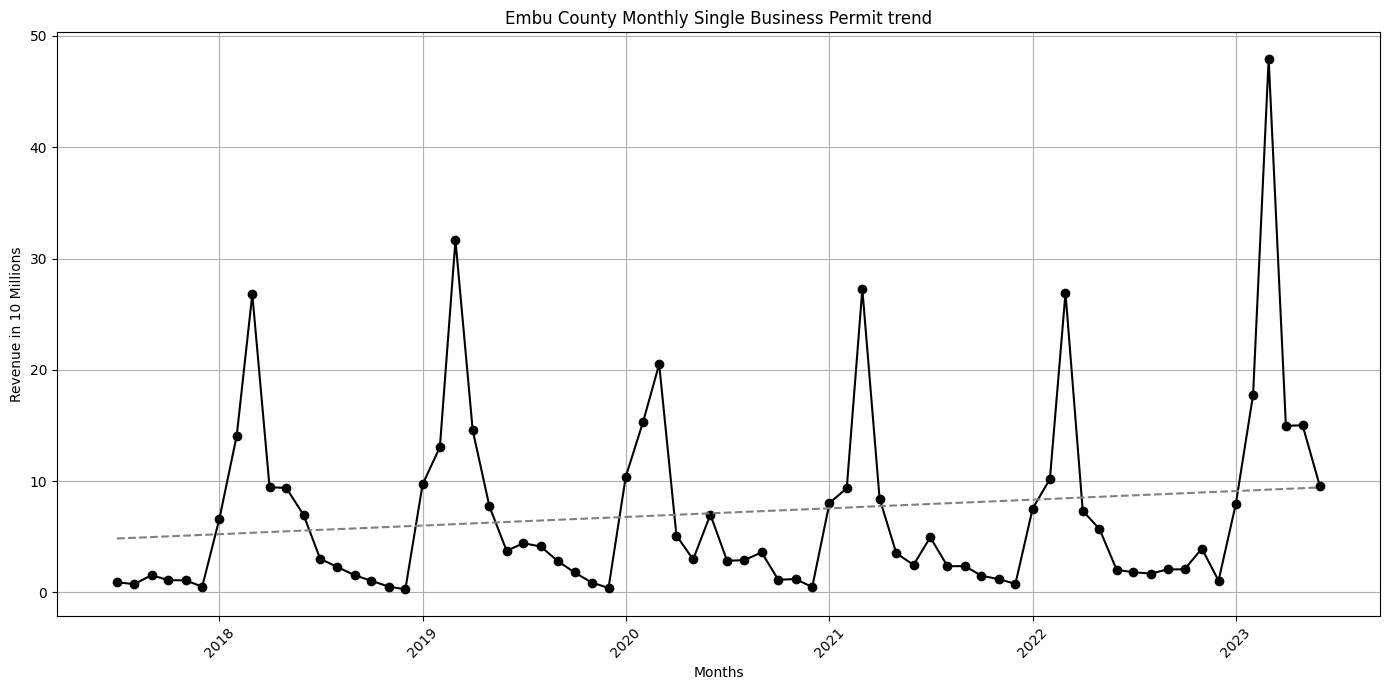

In [9]:
plt.figure(figsize=(14, 7))
    plt.plot(df.Months, df['Single_Business_Permit'], marker='o', linestyle='-', color='black')
    x = np.arange(len(df.Months))
    y = df['Single_Business_Permit']
    coefficients = np.polyfit(x, y, 1)
    trendline = np.polyval(coefficients, x)
    plt.plot(df.Months, trendline, color='grey', linestyle='--', label='Trendline')
    plt.title('Embu County Monthly Single Business Permit trend')
    plt.xlabel('Months')
    plt.ylabel('Revenue in 10 Millions')
    plt.xticks(rotation=45)
    y_ticks=[0,10,20,30,40,50]
    plt.yticks([tick*1_000_000for tick in y_ticks], labels=y_ticks)
    plt.grid()
    plt.tight_layout()
    manager=plt.get_current_fig_manager()
    manager.full_screen_toggle()
    plt.show()


## Obtain optimal parameters from the data

## Import  and fit the model

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
components_df=pd.DataFrame({'observed':df['Single_Business_Permit'],
                             'Date':df['Months']})
components_df.set_index('Date', inplace=True)
components_df.dropna(inplace=True)

In [13]:
model = SARIMAX(components_df['observed'], order=(1,0,0), seasonal_order=(0,1,1,12))
model_fit = model.fit()

## Forecast for 25 months ahead

In [46]:
forecast = model_fit.forecast(steps=25)
forecast_df=pd.DataFrame(forecast)
print(forecast_df)



    predicted_mean
72    6.445483e+06
73    4.086111e+06
74    3.403143e+06
75    2.562957e+06
76    3.566463e+06
77    1.155811e+06
78    8.013380e+06
79    1.583085e+07
80    4.232220e+07
81    1.301266e+07
82    1.240921e+07
83    7.657800e+06
84    5.404410e+06
85    3.513098e+06
86    3.087754e+06
87    2.389364e+06
88    3.470917e+06
89    1.103221e+06
90    7.984434e+06
91    1.581492e+07
92    4.231343e+07
93    1.300784e+07
94    1.240656e+07
95    7.656338e+06
96    5.403606e+06


## Plot forecasts

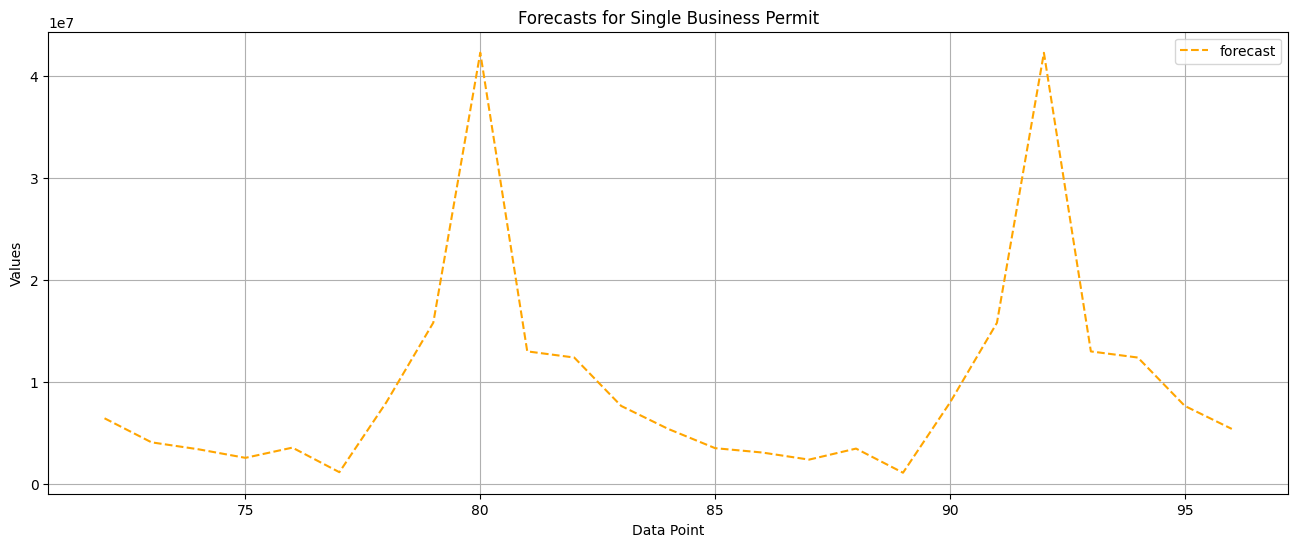

In [51]:

plt.figure(figsize=(16, 6))
plt.plot(forecast_df.index, forecast_df['predicted_mean'], label='forecast', color='orange', linestyle='--')
plt.title('Forecasts for Single Business Permit')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.legend()
plt.grid()
manager=plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()